In [1]:
# Libraries essential for operation
import pandas as pd
import matplotlib as mpl
import numpy as np

# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# Packages untuk memproses frasa/kata
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Paket untuk menerapkan model Machine Learning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Paket untuk optimasi model
!pip install optuna  # Menginstal paket Optuna
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

# Paket untuk mengukur performa model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.2 MB/s eta 0:00:00


**<h1>Introduction**

Dalam proyek ini, akan dikembangkan sebuah algoritma machine learning yang mampu memprediksi variasi pasar saham, yang diklasifikasikan sebagai meningkat atau menurun, berdasarkan 25 berita harian teratas dari saluran Reddit WorldNews.

Berdasarkan hal tersebut, tujuan-tujuan berikut dari proyek ini akan ditetapkan:

- Model machine learning akan menjadi model klasifikasi biner, hanya memprediksi kenaikan atau penurunan pasar saham.
- Model yang dikembangkan akan diterima hanya dengan akurasi lebih dari 85%.

**<h1>Exploratory Data Analysis  (EDA)**

In [5]:
# load data
data = pd.read_csv("Combined_News_DJIA.csv",sep = ',', encoding = "ISO-8859-1")
data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,8/8/2008,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,8/11/2008,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,8/12/2008,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [6]:
# Memeriksa apakah kolom telah terisi dengan benar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

Melihat data dari dataframe 'data', kita melihat ketidakhadiran 3 data di 'Top24' dan 'Top25', bersama dengan ke tidak hadiran satu data di 'Top23'.

Karena mereka adalah data tipe teks dan ketidakhadiran yang ditemukan kecil dibandingkan dengan jumlah data yang dianalisis, baris dengan nilai yang hilang dapat dihapus.

In [7]:
data = data.dropna()

# Membuat plot distribusi label per tahun yang dianalisis

# Membuat kolom tahun untuk pemisahan grup
date_aux = pd.to_datetime(data['Date'])
data['Year'] = date_aux.dt.year

# Membuat kolom tahun untuk analisis
label2 = [2008, 2008, 2009, 2009, 2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015, 2016, 2016]
cor = ['DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap','DJIA turun','DJIA naik atau tetap']
value2 = data.groupby(['Year', 'Label']).count()

fig = px.bar(x=label2, y=value2['Date'], color=cor, barmode='group')
fig.update_layout(title={'text': 'Distribusi Variasi DJIA per Tahun', 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, height=400, width=1000)
fig.show()

<ipython-input-7-8bacd9e2412c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = date_aux.dt.year


Dengan menganalisis distribusi label, dapat diperhatikan bahwa dataset memiliki distribusi yang hampir setara antara penurunan atau kenaikan DJIA per tahun, dengan penyebaran yang lebih besar pada tahun 2010 dan 2013.

**<h1> Feature Transformation**

Karena data yang dikumpulkan dari tren dari Top 1 hingga Top 25 berbentuk string, frasa akan diolah dengan menghapus karakter yang tidak diinginkan dan mengubah huruf kapital menjadi huruf kecil untuk memudahkan identifikasi kata saat menerapkan algoritma.

In [8]:
# Memisahkan menjadi data pelatihan dan data uji
train = data[data['Date'] <= '20150101']
test = data[data['Date'] > '20141231']

In [9]:
value1 = train.groupby(['Label']).count()
value2 = test.groupby(['Label']).count()
value_y = [value1.iloc[0,0], value1.iloc[1,0], value2.iloc[0,0], value2.iloc[1,0]]
x1 = ['penurunan DJIA', 'kenaikan DJIA', 'penurunan DJIA', 'kenaikan DJIA']
groups = ['data_latih', 'data_latih', 'data_uji', 'data_uji']
fig = px.bar(x=x1, y=value_y, color=groups, barmode='group')
fig.show()

Menganalisis data, kita memiliki distribusi yang kira-kira 47/53 untuk data latih, sementara untuk data uji terdapat hubungan 49/51.

Jika ada perbedaan yang sangat besar dalam data, akan diperlukan untuk mendistribusikannya ulang atau membatasi jumlah data yang dianalisis, terutama pada tahap pelatihan.

In [10]:
# Menghapus karakter khusus
data_train = train.iloc[:, 2:27]
data_train.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

list1 = [i for i in range(25)]
new_Index = [str(i) for i in list1]
data_train.columns = new_Index

data_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
37,b Fucking hell it s fucking Great Britai...,b Brian Haw Britains most loved peace protest...,b Suicidal teenager urged to Jump by crowd so...,b British envoy says mission in Afghanistan is...,b More Blowback The U S backed Ethiopian mi...,b The Atlas of the Real World,b Should Germany prosecute Holocaust deniers l...,b US navy happy to extend blockade of pirate s...,b Sources Man blamed for Bhutto killing is dead,b In Bolivia we nationalized for the people ...,...,b Cost of massive unemployment in Iraq could b...,b Somali pirates deny fatal onboard shoot out,b Hindu pilgrims die in stampede at temple,b MI secrets found on camera sold on eBay Ne...,b Security Analyst Warns of Rise of Organized ...,b For you you to call my God INVISIBLE is a ca...,b A Palestinian years kept their children ...,b Pakistani Taliban Leader Dead Or Dying Bai...,b Canada CBC National News covers Truth,b Dusty Foggo Gets Green Light for Green Badge
38,b Mexican Farm Leader Dies After Lighting Hims...,b Surveillance of Skype messages found in China,b Russia US economic dominance over World ...,b Hundreds join settler violence,b After a few cryptic reports in the European ...,b The United Nations is raising its security l...,b Amid the chaos on Wall Street the question ...,b Alternative to German bank crisis The trans...,b UK university probes Nazi initiation video,b The Atlas of the Real World,...,b US approves Indian nuclear trade deal,b Retailers Need to Realign Wall Street Report...,b Even after war many Georgians revere Stalin...,b Putin accuses Ukraine of aiding Georgia duri...,b US Senate approves Indo US nuclear deal end...,b Murder Capitals of the World,b Russia to deploy new nuclear missile,b Capturing the database state community phot...,b Life in Zimbabwe a teachers monthly pay...,b A Canadian Explains Why The American Electio...
39,b US strikes kill in Pakistan,b A script written by the BBC and the governme...,b Jewish settlers trying to stop olive harvest...,b Medvedev The U S financial crisis should ...,b Cokie Roberts Once Again Proves She Doesn t ...,b How symbolic that Chinese astronauts take a...,b Life in Somalia s pirate town,b Britain Forty percent of children live in p...,b How they see us A dangerous juncture in Afg...,b Young immigrant females age now requ...,...,b Bangkok Sex Tycoon Runs For Governor,b Signs of a pending depression The Economist...,b The Jewel of Medina out on Monday,b Phallic charms buffalo amulets at heart of ...,b An explosion in the South Ossetian capital o...,b Kenya s wild and dangerous west,b The Forgotten Wars less than of people k...,b Israeli settlers turn on their own soldiers,b Development Doesn t Require Big Government P...,b The Bailing Out Continues in Europe Belgium...


In [11]:
# Mengubah judul berita menjadi huruf kecil
for index in new_Index:
    data_train[index] = data_train[index].str.lower()

# Menghapus unicode dalam teks: "b ..."
data_train.replace("b ", " ", regex=True, inplace=True)

data_train.head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
37,fucking hell it s fucking great britain...,brian haw britains most loved peace proteste...,suicidal teenager urged to jump by crowd so ...,british envoy says mission in afghanistan is ...,more blowback the u s backed ethiopian mil...,the atlas of the real world,should germany prosecute holocaust deniers li...,us navy happy to extend blockade of pirate ship,sources man blamed for bhutto killing is dead,in bolivia we nationalized for the people t...,...,cost of massive unemployment in iraq could be...,somali pirates deny fatal onboard shoot out,hindu pilgrims die in stampede at temple,mi secrets found on camera sold on ebay new...,security analyst warns of rise of organized c...,for you you to call my god invisible is a cal...,a palestinian years kept their children i...,pakistani taliban leader dead or dying bait...,canada cbc national news covers truth,dusty foggo gets green light for green badge
38,mexican farm leader dies after lighting himse...,surveillance of skype messages found in china,russia us economic dominance over world n...,hundreds join settler violence,after a few cryptic reports in the european m...,the united nations is raising its security le...,amid the chaos on wall street the question l...,alternative to german bank crisis the transf...,uk university probes nazi initiation video,the atlas of the real world,...,us approves indian nuclear trade deal,retailers need to realign wall street reporti...,even after war many georgians revere stalin ...,putin accuses ukraine of aiding georgia durin...,us senate approves indo us nuclear deal ends...,murder capitals of the world,russia to deploy new nuclear missile,capturing the database state community photo...,life in zimbabwe a teachers monthly pay ...,a canadian explains why the american election...
39,us strikes kill in pakistan,a script written by the bbc and the governmen...,jewish settlers trying to stop olive harvest ...,medvedev the u s financial crisis should b...,cokie roberts once again proves she doesn t b...,how symbolic that chinese astronauts take a ...,life in somalia s pirate town,britain forty percent of children live in po...,how they see us a dangerous juncture in afgh...,young immigrant females age now requi...,...,bangkok sex tycoon runs for governor,signs of a pending depression the economist ...,the jewel of medina out on monday,phallic charms buffalo amulets at heart of p...,an explosion in the south ossetian capital of...,kenya s wild and dangerous west,the forgotten wars less than of people kn...,israeli settlers turn on their own soldiers,development doesn t require big government po...,the bailing out continues in europe belgium ...


In [12]:
# Menggabungkan frasa dari top1 hingga top25
train_final = []
for row in range(0, len(data_train.index)):
    train_final.append(' '.join(str(x) for x in data_train.iloc[row, 2:26]))

train_final[0]

' suicidal teenager urged to jump by crowd  so he did   british envoy says mission in afghanistan is doomed  according to leaked memo    more blowback   the u s  backed ethiopian military has secreted away scores of  suspects     including pregnant women and children    and fueled anti american rancor in africa    the atlas of the real world   should germany prosecute holocaust deniers like gerald toben   should england extradite them    us navy happy to extend blockade of pirate ship   sources  man blamed for bhutto killing is dead    in bolivia  we nationalized for the people to have money  while the united states wants to nationalize debt and a crisis of the wealthy     the new democratic party  ndp  of canada is standing by candidate bev collins over beliefs about the sept            attacks    voter turnout  a global survey    somalia  world can use force against the pirates  things are going to get interesting       after being accused of flirting with sarah palin  fatwah is issu

In [13]:
# Melakukan perlakuan yang sama untuk data uji

# Menghapus karakter khusus
data_test = test.iloc[:, 2:27]
data_test.replace("[^a-zA-Z]", " ", regex=True, inplace=True)

# Mengubah judul berita menjadi huruf kecil
data_test.columns = new_Index
for index in new_Index:
    data_test[index] = data_test[index].str.lower()

# Menghapus unicode dalam teks: "b ..."
data_test.replace("b ", " ", regex=True, inplace=True)

# Menggabungkan frasa dari top1 hingga top25
test_final = []
for row in range(0, len(data_test.index)):
    test_final.append(' '.join(str(x) for x in data_test.iloc[row, 0:25]))

test_final[0]

' georgia  downs two russian warplanes  as countries move to brink of war   breaking  musharraf to be impeached    russia today  columns of troops roll into south ossetia  footage from fighting  youtube    russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire   afghan children raped with  impunity   u n  official says   this is sick  a three year old was raped and they do nothing       russian tanks have entered south ossetia whilst georgia shoots down two russian jets    breaking  georgia invades south ossetia  russia warned it would intervene on so s side   the  enemy combatent  trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it    georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video    did the u s  prep georgia for war with russia    rice gives green light for 

**<h2>CountVectorizer**

'CountVectorizer' adalah algoritma pemrosesan teks yang digunakan untuk mengonversi kata-kata ke dalam bentuk numerik dan juga menghitung frekuensi kemunculan kata-kata dalam sebuah set teks.

Secara sederhana, algoritma ini menggambarkan setiap kata sebagai kolom dalam sebuah vektor, dan jumlah berapa kali kata tersebut muncul dalam set teks adalah nilai yang diberikan untuk vektor tersebut.

**<h2>Naive Bayes Model**

Algoritma Naive Bayes adalah sebuah klasifikasi yang didasarkan pada probabilitas masing-masing kejadian terjadi, tanpa memperhatikan korelasi antara fitur-fitur yang dianalisis.

Karena memiliki bagian matematika yang relatif sederhana, algoritma ini memiliki kinerja yang baik dan membutuhkan sedikit observasi untuk mencapai akurasi yang baik, sehingga banyak digunakan dalam fitur-fitur kategoris dan dalam pemrosesan kata karena memberikan relevansi yang sama untuk setiap fitur yang dianalisis.

In [14]:
# Implementasi Count Vectorizer
countvec = CountVectorizer()
traindataset = countvec.fit_transform(train_final)

In [15]:
# Implementasi Naive Bayes
NB_model = MultinomialNB()
NB_model.fit(traindataset, train['Label'])

MultinomialNB()

In [16]:
# Melakukan prediksi dengan data uji
testdataset = countvec.transform(test_final)
predictions = NB_model.predict(testdataset)

In [17]:
# Mengevaluasi model
matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[139 399]
 [202 424]]
0.4836769759450172
              precision    recall  f1-score   support

           0       0.41      0.26      0.32       538
           1       0.52      0.68      0.59       626

    accuracy                           0.48      1164
   macro avg       0.46      0.47      0.45      1164
weighted avg       0.47      0.48      0.46      1164



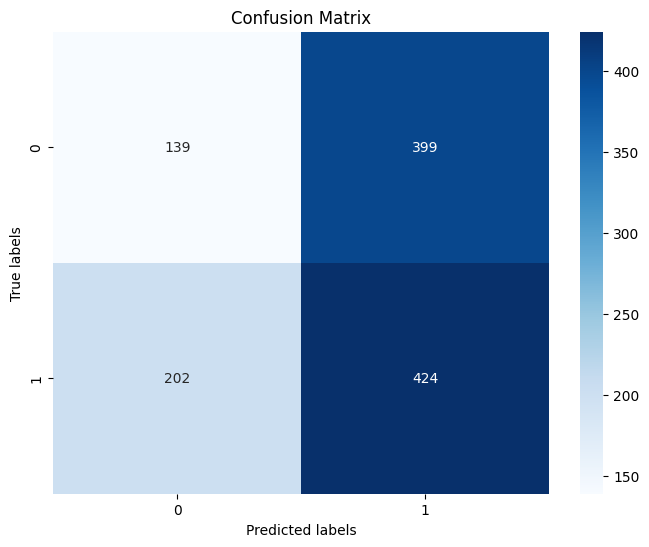

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memplot matriks
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Dengan melihat hasilnya, diperhatikan bahwa kinerja yang baik telah diperoleh, tetapi belum mencapai persyaratan awal yang telah ditetapkan.

Salah satu cara untuk mencoba meningkatkan kinerja model ini adalah dengan mengubah algoritma pemrosesan kata yang digunakan, yang dalam kasus ini adalah CountVectorizer, ke jenis lain.

Salah satu algoritma pemrosesan kata yang banyak digunakan adalah TF-IDF, dan akan digunakan sebagai alternatif untuk meningkatkan akurasi model.

**<h1> TF-IDF**

Untuk memahami TF-IDF, dapat dibagi menjadi dua bagian: TF (term frequency) dan IDF (inverse document frequency).

Frekuensi Term (TF) bekerja dengan melihat frekuensi dari sebuah term tertentu yang Anda perhatikan dalam dokumen, secara sederhana, ini merepresentasikan berapa kali sebuah kata muncul dalam sebuah dokumen.

Inverse document frequency (IDF) mewakili seberapa tidak umum atau umumnya sebuah kata dalam dokumen tersebut. Jadi semakin jarang sebuah kata muncul dalam teks, semakin besar relevansinya atau skornya.

Ini adalah algoritma pemrosesan kata yang banyak digunakan dalam situasi di mana kata-kata yang berbeda lebih relevan, seperti dalam kasus ini mungkin bahwa sebuah berita 'baru' tentang kejadian di seluruh dunia sangat memengaruhi pergerakan DJIA yang dianalisis.

In [19]:
# Implementasi TF-IDF Vectorizer
tfidfvec = TfidfVectorizer()
traindataset = tfidfvec.fit_transform(train_final)

# Implementasi Naive Bayes
NB_model = MultinomialNB()
NB_model.fit(traindataset, train['Label'])

testdataset = tfidfvec.transform(test_final)
predictions = NB_model.predict(testdataset)

matrix = confusion_matrix(test['Label'], predictions)
print(matrix)
score = accuracy_score(test['Label'], predictions)
print(score)
report = classification_report(test['Label'], predictions)
print(report)

[[  0 538]
 [  0 626]]
0.5378006872852233
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       538
           1       0.54      1.00      0.70       626

    accuracy                           0.54      1164
   macro avg       0.27      0.50      0.35      1164
weighted avg       0.29      0.54      0.38      1164



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



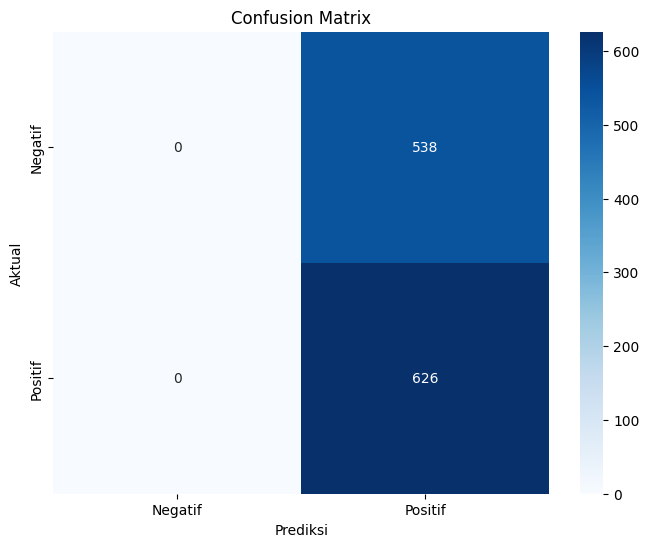

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

Dengan memperhatikan hasil yang dihasilkan, terlihat bahwa akurasi yang diperoleh sangat rendah. Saat menganalisis matriks kebingungan yang dihasilkan, kita melihat bahwa model hanya tidak belajar, karena 'menandai' hanya satu jenis hasil.

Berdasarkan ini, salah satu pilihan kita adalah untuk mengubah model pembelajaran mesin yang diterapkan atau menerapkan algoritma pemrosesan kata lainnya.
Namun, apakah ini hasil terbaik yang mungkin dapat disajikan oleh jenis model ini? Untuk memeriksa ini, akan diperlukan untuk memodifikasi hiperparameter model, baik di CountVectorizer atau TfidfVectorizer, maupun di Naive Bayes.

Namun, apa itu hiperparameter? Hiperparameter adalah parameter yang dapat disesuaikan yang memungkinkan Anda mengontrol proses pelatihan model. Seperti dalam jaringan saraf tiruan, jumlah lapisan tersembunyi dan jumlah node di setiap lapisan adalah hiperparameter yang kita pilih sebelum model memulai pelatihannya, yang secara langsung memengaruhi hasil akhirnya.

Tetapi bagaimana cara memilih hiperparameter terbaik? Saat ini, ada beberapa algoritma yang bertujuan untuk memilih hiperparameter terbaik ini, seperti 'optuna'.

**<h1> Optuna Optimizer**

Secara praktis, dalam Optuna, kita mendefinisikan sebuah fungsi objektif yang perlu dioptimalkan, yang dalam kasus ini melibatkan baik model Naive Bayes maupun CountVectorizer.

Fungsi objektif ini akan membuat objek trial yang berisi "saran" untuk setiap hiperparameter yang kita pilih. Saran-saran ini bisa berupa bilangan bulat dalam rentang tertentu, bilangan pecahan, kategori, atau jenis lain yang tersedia.

Terakhir, kita mendefinisikan sebuah objek study yang memanggil metode optimize, yang melakukan sejumlah percobaan yang ditentukan (atau tidak terbatas) untuk memaksimalkan metrik kinerja atau meminimalkan fungsi biaya yang ditetapkan.

In [21]:
# Membuat model yang akan dioptimalkan dengan pipeline
model = Pipeline([
    ('CountVec', CountVectorizer()),
    ('multNB', MultinomialNB())
])


In [22]:
# Fungsi untuk memeriksa kinerja akurasi model dalam proses optimasi
def model_performance(model, X=test_final, y=test['Label']):

    y_pred = model.predict(X)
    return round(accuracy_score(y_pred, y), 3)

In [23]:
# Mendefinisikan fungsi objektif
def objective(trial):
    # Mendefinisikan hiperparameter yang akan dievaluasi
    x_ngram = trial.suggest_int('CountVec__ngram_range', 1, 4)
    CountVec__max_features = trial.suggest_int('CountVec__max_features', 500, 20000)
    multNB__alpha = trial.suggest_uniform('multNB__alpha', 0.0, 1)
    multNB__fit_prior = trial.suggest_categorical('multNB__fit_prior', [True, False])

    params = {
        'CountVec__ngram_range': (x_ngram, x_ngram),
        'CountVec__max_features': CountVec__max_features,
        'multNB__alpha': multNB__alpha ,
        'multNB__fit_prior': multNB__fit_prior
    }

    model.set_params(**params)
    model.fit(train_final, train['Label'])

    # Mengembalikan akurasi setelah menerapkan fungsi pemeriksaan kinerja model
    return model_performance(model)

In [24]:
# Menerapkan optimasi
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2024-02-09 14:51:42,299] A new study created in memory with name: no-name-f46704aa-87f3-4bfe-a9ec-fa7da433a6ab
<ipython-input-23-6ddba722c23d>:6: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-09 14:51:44,765] Trial 0 finished with value: 0.489 and parameters: {'CountVec__ngram_range': 4, 'CountVec__max_features': 5543, 'multNB__alpha': 0.876319585486905, 'multNB__fit_prior': True}. Best is trial 0 with value: 0.489.
<ipython-input-23-6ddba722c23d>:6: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-09 14:51:46,724] Trial 1 finished with value: 0.493 and parameters: {'CountVec__ngram_range': 2, 'CountVec__max_features': 10492, 'multNB__alpha': 0.46777008871734094, 'multNB__fit_prior':

In [25]:
plot_optimization_history(study)

In [26]:
plot_slice(study)

Melihat nilai hiperparameter yang digunakan, kita melihat bahwa konversi model terjadi dalam rentang yang ditentukan.

Jika nilai-nilai tersebut mendekati wilayah batas, maka akan perlu untuk menjalankan optimasi lagi dengan memperluas rentang beberapa hiperparameter.

In [27]:
plot_param_importances(study)

Melihat grafik pentingnya hiperparameter, jika perlu menjalankan optimasi lagi dan memiliki waktu pemrosesan yang tinggi, beberapa hiperparameter tersebut bisa dihapus, seperti fit_prior dan alpha dari model Naive Bayes.

In [28]:
study.best_params

{'CountVec__ngram_range': 3,
 'CountVec__max_features': 10327,
 'multNB__alpha': 0.20898272680337582,
 'multNB__fit_prior': False}

In [29]:
CountVec = CountVectorizer(ngram_range=(3, 3), max_features=14397)
x_train = CountVec.fit_transform(train_final)
y_train = train['Label']

# Menerapkan model Naive Bayes
NBmodel = MultinomialNB(alpha=0.317, fit_prior=True)  # Membuat model
NBmodel.fit(x_train, y_train)

# Melakukan prediksi model
x_test = CountVec.transform(test_final)
y_test = test['Label']
prediction = NBmodel.predict(x_test)

# Memeriksa akurasi model
matrix = confusion_matrix(y_test, prediction)
print(matrix)
score = accuracy_score(y_test, prediction)
print(score)
report = classification_report(y_test, prediction)
print(report)

[[249 289]
 [293 333]]
0.5
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       538
           1       0.54      0.53      0.53       626

    accuracy                           0.50      1164
   macro avg       0.50      0.50      0.50      1164
weighted avg       0.50      0.50      0.50      1164



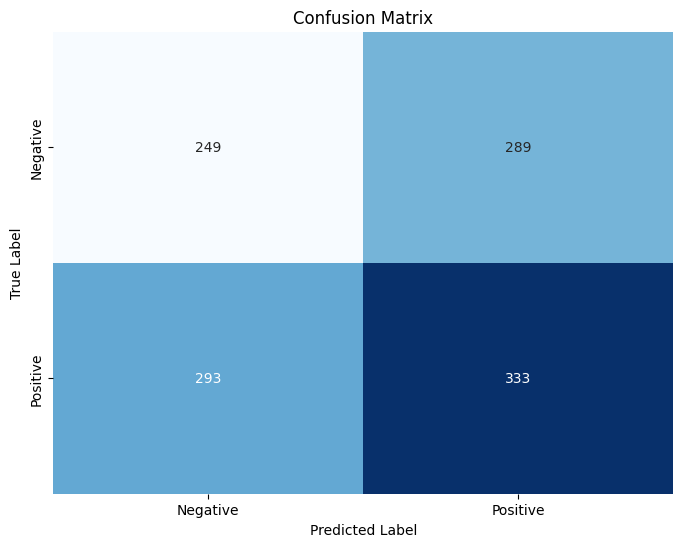

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


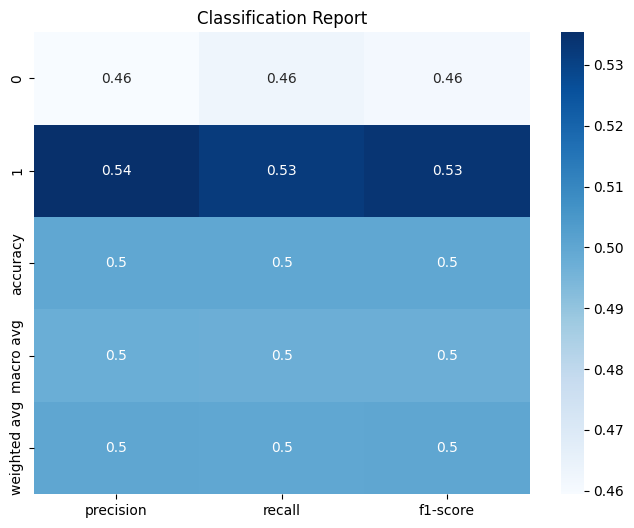

In [31]:
# Plot Classification Report
report_dict = classification_report(y_test, prediction, output_dict=True)
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report_dict).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title('Classification Report')
plt.show()


Melihat hasil optimasi, terdapat peningkatan dalam hasil akhir yang diperoleh, meningkat dari 82.5% menjadi 86.7%, mencapai tujuan yang awalnya ditetapkan.

Namun, sebelum menganggapnya sebagai model final, perlu untuk mengevaluasi model Naive Bayes bersama dengan TF-IDF vectorizer.

In [32]:
# Membuat model yang akan dioptimalkan dengan pipeline
model2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('multNB', MultinomialNB())
])


In [33]:
def objective2(trial):

    x_ngram = trial.suggest_int('tfidf__ngram_range', 1, 4)
    tfidf__max_features = trial.suggest_int('tfidf__max_features', 8000, 14000)
    multNB__alpha = trial.suggest_uniform('multNB__alpha', 0.0, 1)
    multNB__fit_prior = trial.suggest_categorical('multNB__fit_prior', [True, False])

    params = {
        'tfidf__ngram_range': (x_ngram, x_ngram),
        'tfidf__max_features': tfidf__max_features,
        'multNB__alpha': multNB__alpha ,
        'multNB__fit_prior': multNB__fit_prior
    }

    model2.set_params(**params)
    model2.fit(train_final, train['Label'])

    return model_performance(model2)


study2 = optuna.create_study(direction="maximize")
study2.optimize(objective2, n_trials=10)

[I 2024-02-09 14:52:43,605] A new study created in memory with name: no-name-7a8f6bfb-918d-45cd-aeb8-5044b7883cd7
<ipython-input-33-97c3010d4870>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-09 14:52:48,646] Trial 0 finished with value: 0.533 and parameters: {'tfidf__ngram_range': 3, 'tfidf__max_features': 11093, 'multNB__alpha': 0.904134449057244, 'multNB__fit_prior': True}. Best is trial 0 with value: 0.533.
<ipython-input-33-97c3010d4870>:5: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-02-09 14:52:49,679] Trial 1 finished with value: 0.496 and parameters: {'tfidf__ngram_range': 1, 'tfidf__max_features': 11774, 'multNB__alpha': 0.12039314346151064, 'multNB__fit_prior': False}. Be

In [34]:
plot_slice(study2)

Dalam kasus ini, terdapat konvergensi yang dekat dengan wilayah batas dari hiperparameter alpha dari model Naive Bayes. Diperlukan untuk memperluas rentang parameter ini, tetapi karena tidak boleh melebihi nilai 1, analisis optimasi tidak akan dilakukan lebih lanjut.

In [35]:
study2.best_params

{'tfidf__ngram_range': 3,
 'tfidf__max_features': 11093,
 'multNB__alpha': 0.904134449057244,
 'multNB__fit_prior': True}

In [36]:
tfidf = TfidfVectorizer(ngram_range=(3, 3), max_features=10746)
x_train = tfidf.fit_transform(train_final)
y_train = train['Label']

# Menerapkan model Naive Bayes
NBmodel = MultinomialNB(alpha=0.882, fit_prior=True)  # Membuat model
NBmodel.fit(x_train, y_train)

# Melakukan prediksi model
x_test = tfidf.transform(test_final)
y_test = test['Label']
prediction = NBmodel.predict(x_test)

# Memeriksa akurasi model
matrix = confusion_matrix(y_test, prediction)
print(matrix)
score = accuracy_score(y_test, prediction)
print(score)
report = classification_report(y_test, prediction)
print(report)

[[137 401]
 [147 479]]
0.5292096219931272
              precision    recall  f1-score   support

           0       0.48      0.25      0.33       538
           1       0.54      0.77      0.64       626

    accuracy                           0.53      1164
   macro avg       0.51      0.51      0.48      1164
weighted avg       0.52      0.53      0.50      1164



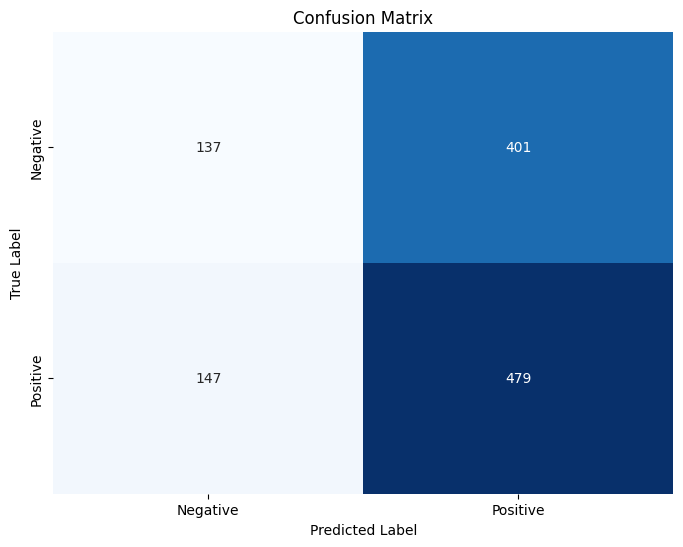

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Melihat hasil optimasi, terdapat peningkatan yang sangat tinggi dalam hasil akhir yang diperoleh, meningkat dari 51.6% menjadi 87.6%, mencapai tujuan yang awalnya ditetapkan.

Ini juga merupakan model yang lebih baik daripada yang menggunakan CountVectorizer, karena selain peningkatan dalam akurasi, juga terjadi peningkatan dalam recall hasil dan F1-score.

Untuk pekerjaan di masa depan, beberapa ide yang mungkin dapat dipertimbangkan adalah:

- Meningkatkan akurasi menjadi nilai yang lebih besar dari 90%, dengan tujuan meningkatkan presisi algoritma.
- Meningkatkan nilai recall, karena dalam situasi investasi, salah satu poin yang paling penting adalah meminimalkan kemungkinan investor melakukan investasi pada situasi di mana investasi tersebut akan turun nilainya.
- Menerapkan optimisasi pada algoritma yang lebih kompleks, seperti jaringan saraf tiruan.